Ejercicio 15.C

Muestra ahora el mismo gráfico pero añadiendo:

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

La siguiente función de python retorna 3 variables llamadas x , y y z.

In [15]:
def get_data():
    size = 150
    num_tipos = 10
    pendiente_base = -8
    np.random.seed(6)

    x = np.array([])
    y = np.array([])
    z = np.array([])
    x_ini = 0
    y_ini = 50
    z_ini = 0
    x_ancho = 8
    y_ancho = 60
    x_inc = 2
    y_inc = y_ancho - 3
    z_int = 10

    for i in range(0, num_tipos):
        pendiente = np.random.uniform(pendiente_base - 0.4, pendiente_base + 0.4, 1)[0]
        x_tipo = np.random.uniform(x_ini, x_ini + x_ancho, size)
        y_tipo = np.random.uniform(y_ini, y_ini + y_ancho, size) + pendiente * x_tipo
        z_tipo = np.full(size, z_ini)

        x = np.concatenate((x, x_tipo))
        y = np.concatenate((y, y_tipo))
        z = np.concatenate((z, z_tipo))

        x_ini = x_ini + x_inc
        y_ini = y_ini + y_inc
        z_ini = z_ini + z_int

    return x, y, z

Para hacer la regresión usa la siguiente función:

In [16]:
def get_recta_regresion(x, y):
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
    x_init = x.min()
    y_init = model.predict([[x_init]])[0, 0]
    x_fin = x.max()
    y_fin = model.predict([[x_fin]])[0, 0]

    return [x_init, x_fin], [y_init, y_fin]

Esta función retorna los puntos iniciales y finales de la recta de la regresión pero lo primero que retorna son las x's de los 2 puntos y luego las y's de los 2 puntos. Se ha hecho así para que sea fácil de dibujar la recta con la función plot

Ahora haz lo siguiente:

Muestra un gráfico mostrando:
    - En el eje X la cantidad de vacuna inyectada
    - En el eje Y la cantidad de pacientes que se han enfermado con COVID cada 100.000 habitantes.
    - Muestra nombre de los ejes
    
    - Que se muestre cada punto de un color distinto según el rango de edad (La variable z).
    - Muestra una leyenda para cada uno de los "colores". Sabiendo que cada color realmente corresponde a un rango de edad.
    - Quita el ajuste lineal que habías hecho.

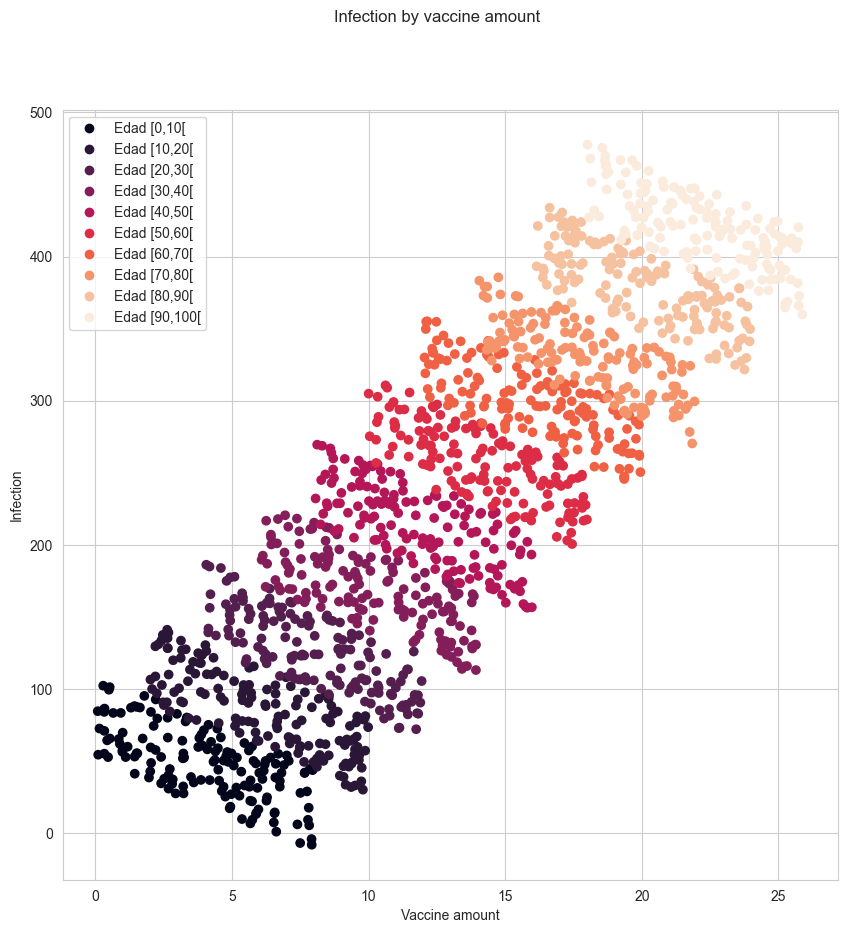

In [17]:
x, y, z = get_data()

x_regression, y_regression = get_recta_regresion(x, y)

figure = plt.figure(figsize=(10, 10))
figure.suptitle('Infection by vaccine amount')

axe = figure.add_subplot()
scatter = axe.scatter(x, y, c=z)
axe.set_xlabel('Vaccine amount')
axe.set_ylabel('Infection')

axe.legend(handles=scatter.legend_elements()[0],
           labels=["Edad [0,10[", "Edad [10,20[", "Edad [20,30[", "Edad [30,40[", "Edad [40,50[", "Edad [50,60[",
                   "Edad [60,70[", "Edad [70,80[", "Edad [80,90[", "Edad [90,100["])

Mas cantidad de vacuna inyectada equivale a mas probabilidad de ser infectado por covid